In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import sqlalchemy as sqla



#Check if there's wind data, there is! (want wind, precip, air temperature)
#Check if trend of increase in ave temperature, high wind conditons, low amounts of precipitation

#AWND', 'PRCP', 'TMAX', 'TAVG' 'EMXT'
#Average wind speed, precip, max temp, average temp,extreme max temp for the period

In [2]:
dates = pd.date_range(start = "01-01-2000", end = "12-31-2020", freq = 'Y')#get years
dates = dates.strftime("%Y")#extract year 
dates = dates.to_list() #put dates into a python list

# LA

(LOS ANGELES DOWNTOWN USC)
GHCND:USW00093134

In [3]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00093134&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
la_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(la_dat)
la_dat['year'] = la_dat['date'].dt.year #make year column getting year from datetime
#print(type(la_dat)) 
#print(la_dat)
final_la = la_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_la.dropna() #drop na values
#final_la.head()

final_la['TAVG'] = final_la[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_la_result = final_la.groupby('year').mean()
final_la_result.head()

datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.053650,72.425,55.035,2.816500,63.7300
2001,0.083284,70.855,53.695,2.790547,62.2750
2002,0.007800,71.790,54.020,2.895000,62.9050
2003,0.053500,72.875,55.120,2.712000,63.9975
2004,0.032850,73.565,55.755,2.440500,64.6600


In [4]:
final_la_result = final_la_result.assign(city='la')
final_la_result

datatype,PRCP,TMAX,TMIN,AWND,TAVG,city
year,,,,,,
2000,0.053650,72.425000,55.035000,2.816500,63.730000,la
2001,0.083284,70.855000,53.695000,2.790547,62.275000,la
2002,0.007800,71.790000,54.020000,2.895000,62.905000,la
2003,0.053500,72.875000,55.120000,2.712000,63.997500,la
2004,0.032850,73.565000,55.755000,2.440500,64.660000,la
2005,0.116847,72.137931,55.152709,2.866667,63.645320,la
2006,0.041200,75.764000,57.544000,1.977200,66.654000,la
2007,0.007600,75.896000,57.108000,1.810000,66.502000,la
2008,0.039080,75.380000,56.692000,1.809200,66.036000,la


# SF

(Oakland International Airport) 
GHCND:USW00023230

In [5]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00023230&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
sf_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(sf_dat)
sf_dat['year'] = sf_dat['date'].dt.year #make year column getting year from datetime
#print(type(sf_dat)) 
#print(sf_dat)
final_sf = sf_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_sf.dropna() #drop na values
#final_sf.head()

final_sf['TAVG'] = final_sf[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_sf_result = final_sf.groupby('year').mean()
final_sf_result.head()

datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.086350,64.240,49.180,9.432500,56.710
2001,0.056030,64.550,47.110,9.159204,55.830
2002,0.037035,63.785,47.165,8.891045,55.475
2003,0.039050,65.355,48.845,8.856000,57.100
2004,0.012965,65.790,49.030,9.083085,57.410


In [6]:
final_sf_result = final_sf_result.assign(city='sf')
final_sf_result

datatype,PRCP,TMAX,TMIN,AWND,TAVG,city
year,,,,,,
2000,0.086350,64.240000,49.180000,9.432500,56.710000,sf
2001,0.056030,64.550000,47.110000,9.159204,55.830000,sf
2002,0.037035,63.785000,47.165000,8.891045,55.475000,sf
2003,0.039050,65.355000,48.845000,8.856000,57.100000,sf
2004,0.012965,65.790000,49.030000,9.083085,57.410000,sf
2005,0.081300,64.665000,49.465000,8.866000,57.065000,sf
2006,0.065400,66.340000,50.148000,9.117600,58.244000,sf
2007,0.028884,66.380000,49.804000,8.716064,58.092000,sf
2008,0.036440,65.956000,48.864000,8.637600,57.410000,sf


# SD

(CARLSBAD MCCLELLAN PALOMAR AIRPORT) 
GHCND:USW00003177

In [7]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00003177&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
sd_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(sd_dat)
sd_dat['year'] = sd_dat['date'].dt.year #make year column getting year from datetime
#print(type(sd_dat)) 
#print(sd_dat)
final_sd = sd_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_sd.dropna() #drop na values
#final_sd.head()

final_sd['TAVG'] = final_sd[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_sd_result = final_sd.groupby('year').mean()
final_sd_result.head()

datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.023400,66.720000,53.880000,5.138000,60.300000
2001,0.035124,64.954774,52.798995,5.078607,58.876884
2002,0.007050,64.975000,52.050000,5.259500,58.512500
2003,0.044121,66.585000,53.605000,5.126368,60.095000
2004,0.025050,67.105000,54.265000,5.006500,60.685000


In [8]:
final_sd_result = final_sd_result.assign(city='sd')
final_sd_result

datatype,PRCP,TMAX,TMIN,AWND,TAVG,city
year,,,,,,
2000,0.023400,66.720000,53.880000,5.138000,60.300000,sd
2001,0.035124,64.954774,52.798995,5.078607,58.876884,sd
2002,0.007050,64.975000,52.050000,5.259500,58.512500,sd
2003,0.044121,66.585000,53.605000,5.126368,60.095000,sd
2004,0.025050,67.105000,54.265000,5.006500,60.685000,sd
2005,0.065350,66.760000,54.206030,5.068159,60.565000,sd
2006,0.025657,69.872000,57.325301,4.909600,63.648000,sd
2007,0.014741,68.264000,56.184000,4.440562,62.224000,sd
2008,0.029960,68.392000,55.968000,4.108800,62.180000,sd


# Sacramento

GHCND:USW00023232

In [9]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00023232&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
sc_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(sc_dat)
sc_dat['year'] = sc_dat['date'].dt.year #make year column getting year from datetime
#print(type(sc_dat)) 
#print(sc_dat)
final_sc = sc_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_sc.dropna() #drop na values
#final_sc.head()

final_sc['TAVG'] = final_sc[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_sc_result = final_sc.groupby('year').mean()
final_sc_result.head()

datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.09805,71.645,48.515,6.849751,60.0800
2001,0.05970,73.035,47.625,6.956000,60.3300
2002,0.04190,71.545,46.280,6.346766,58.9125
2003,0.04075,71.885,48.170,6.253000,60.0275
2004,0.03930,73.395,49.015,6.741000,61.2050


In [10]:
final_sc_result = final_sc_result.assign(city='sc')
final_sc_result

datatype,PRCP,TMAX,TMIN,AWND,TAVG,city
year,,,,,,
2000,0.098050,71.645000,48.515000,6.849751,60.080000,sc
2001,0.059700,73.035000,47.625000,6.956000,60.330000,sc
2002,0.041900,71.545000,46.280000,6.346766,58.912500,sc
2003,0.040750,71.885000,48.170000,6.253000,60.027500,sc
2004,0.039300,73.395000,49.015000,6.741000,61.205000,sc
2005,0.060950,70.750000,48.460000,6.193500,59.605000,sc
2006,0.053920,75.556000,50.072000,6.398800,62.814000,sc
2007,0.026400,77.500000,48.748000,6.614000,63.124000,sc
2008,0.034280,76.432000,48.816000,6.305200,62.624000,sc


# SB

(CAMARILLO AIRPORT) 
GHCND:USW00023136

In [11]:
#web services token request to get access API
token = {'token':'MrWrsDFlCRWqtWFmHQIWDvZhwgvayJqH'}

df = []
for i in dates: #start and end parameters can only do one year so this is ho
    responses = requests.get(url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&stationid=GHCND:USW00023136&datatypeid=TMAX&datatypeid=TMIN&datatypeid=PRCP&datatypeid=TAVG&datatypeid=AWND&limit=1000&startdate="+str(i)+"-01-01&enddate="+str(i)+"-12-31&units=standard" , headers = token)
    response_js = responses.json()
    #print(response_js)
    df_temp = pd.DataFrame(response_js["results"]) #want results part with all those columns
    #print(df) #df has to be in loop to get all the years 
    df.append(df_temp[['date', 'datatype', 'value']]) #get columns you want
    #print(df) #appended entire dataframe to list to keep all the years, so won't have to worry about adding them
station_df = pd.concat(df) #make list of iterated dataframes to one dataframe
station_df['date'] = pd.to_datetime(station_df['date'])
#print(station_df.columns)
#print(station_df)
sb_dat = station_df.pivot_table('value', 'date', 'datatype').reset_index()#leave date
#print(sb_dat)
sb_dat['year'] = sb_dat['date'].dt.year #make year column getting year from datetime
#print(type(sb_dat)) 
#print(sb_dat)
final_sb = sb_dat[['date', 'year','PRCP', 'TMAX', 'TMIN', 'AWND']]
final_sb.dropna() #drop na values
#final_sb.head()

final_sb['TAVG'] = final_sb[['TMAX', 'TMIN']].mean(axis=1)
#Take average of the values in each column and group by year so only 2000-2022 individually
final_sb_result = final_sb.groupby('year').mean()
final_sb_result.head()

datatype,PRCP,TMAX,TMIN,AWND,TAVG
year,,,,,
2000,0.050547,69.567839,50.402010,5.828358,59.984925
2001,0.067500,67.880000,49.954774,6.104478,58.977500
2002,0.007250,68.490000,47.340000,6.310000,57.915000
2003,0.046450,70.420000,50.375000,6.603500,60.397500
2004,0.021850,70.790000,49.880000,6.112500,60.335000


In [12]:
final_sb_result = final_sb_result.assign(city='sb')
final_sb_result

datatype,PRCP,TMAX,TMIN,AWND,TAVG,city
year,,,,,,
2000,0.050547,69.567839,50.402010,5.828358,59.984925,sb
2001,0.067500,67.880000,49.954774,6.104478,58.977500,sb
2002,0.007250,68.490000,47.340000,6.310000,57.915000,sb
2003,0.046450,70.420000,50.375000,6.603500,60.397500,sb
2004,0.021850,70.790000,49.880000,6.112500,60.335000,sb
2005,0.100850,69.280000,51.140000,6.436500,60.210000,sb
2006,0.042151,70.948000,50.968000,5.971888,60.958000,sb
2007,0.007738,70.936000,50.300000,5.506855,60.618000,sb
2008,0.015538,71.612000,51.248996,5.542000,61.476000,sb


# Combine all cities

In [38]:
dataset = pd.concat([final_sb_result,final_sf_result,final_sd_result,final_sc_result,final_la_result])
dataset = dataset.reset_index()
dataset

datatype,year,PRCP,TMAX,TMIN,AWND,TAVG,city
0,2000,0.050547,69.567839,50.402010,5.828358,59.984925,sb
1,2001,0.067500,67.880000,49.954774,6.104478,58.977500,sb
2,2002,0.007250,68.490000,47.340000,6.310000,57.915000,sb
3,2003,0.046450,70.420000,50.375000,6.603500,60.397500,sb
4,2004,0.021850,70.790000,49.880000,6.112500,60.335000,sb
...,...,...,...,...,...,...,...
100,2016,0.023400,76.320000,58.240000,1.854400,67.280000,la
101,2017,0.052240,77.116000,59.228000,1.952000,68.172000,la
102,2018,0.018327,76.513944,58.564000,1.585887,67.589641,la
103,2019,0.058240,73.772000,57.536000,1.894000,65.654000,la


### variables by cities

In [14]:
#conda install geopandas
#import geopandas as gpd
#import descartes

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')

In [45]:
import matplotlib.pyplot as plt

In [53]:
#fig, ax = plt.subplots(1, figsize=(10,6))
#dataset.plot(column='PRCP', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
#ax.set_title('Total Monthly Precipitation by cities')
#ax.axis('off')

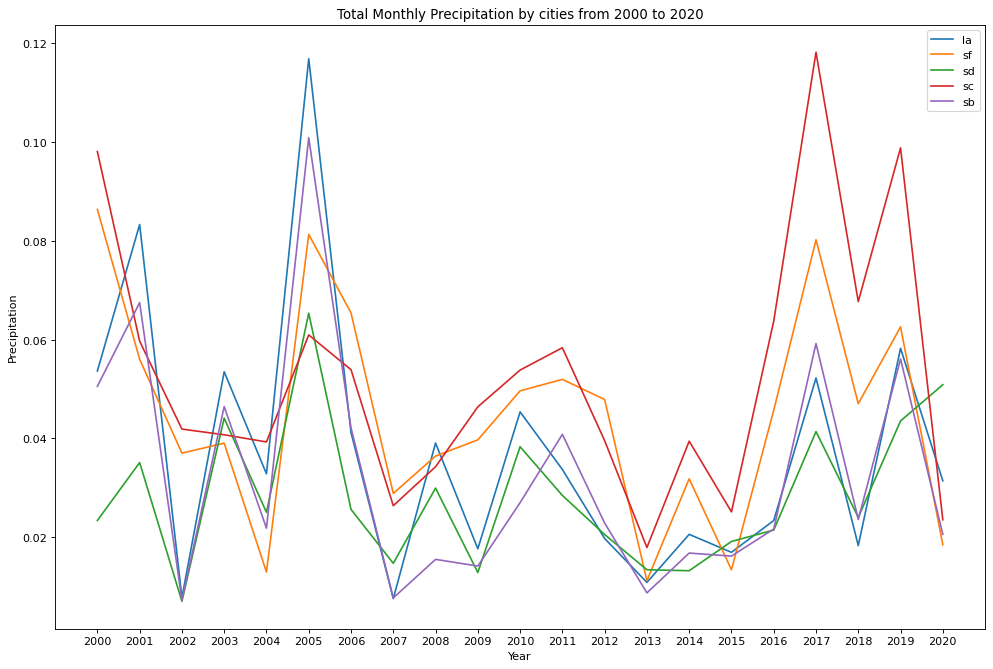

In [37]:
# Precipitation
figure(figsize=(15, 10), dpi=80)
# la
plt.plot(dataset[dataset['city'] == 'la']['year'], 
         dataset[dataset['city'] == 'la']['PRCP'], label='la')
# sf
plt.plot(dataset[dataset['city'] == 'sf']['year'], 
         dataset[dataset['city'] == 'sf']['PRCP'], label='sf')
# sd
plt.plot(dataset[dataset['city'] == 'sd']['year'], 
         dataset[dataset['city'] == 'sd']['PRCP'], label='sd')
# sc
plt.plot(dataset[dataset['city'] == 'sc']['year'], 
         dataset[dataset['city'] == 'sc']['PRCP'], label='sc')
# sb
plt.plot(dataset[dataset['city'] == 'sb']['year'], 
         dataset[dataset['city'] == 'sb']['PRCP'], label='sb')

plt.title('Total Monthly Precipitation by cities from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.xticks(np.arange(2000, 2021, 1.0))
plt.legend()
plt.show()

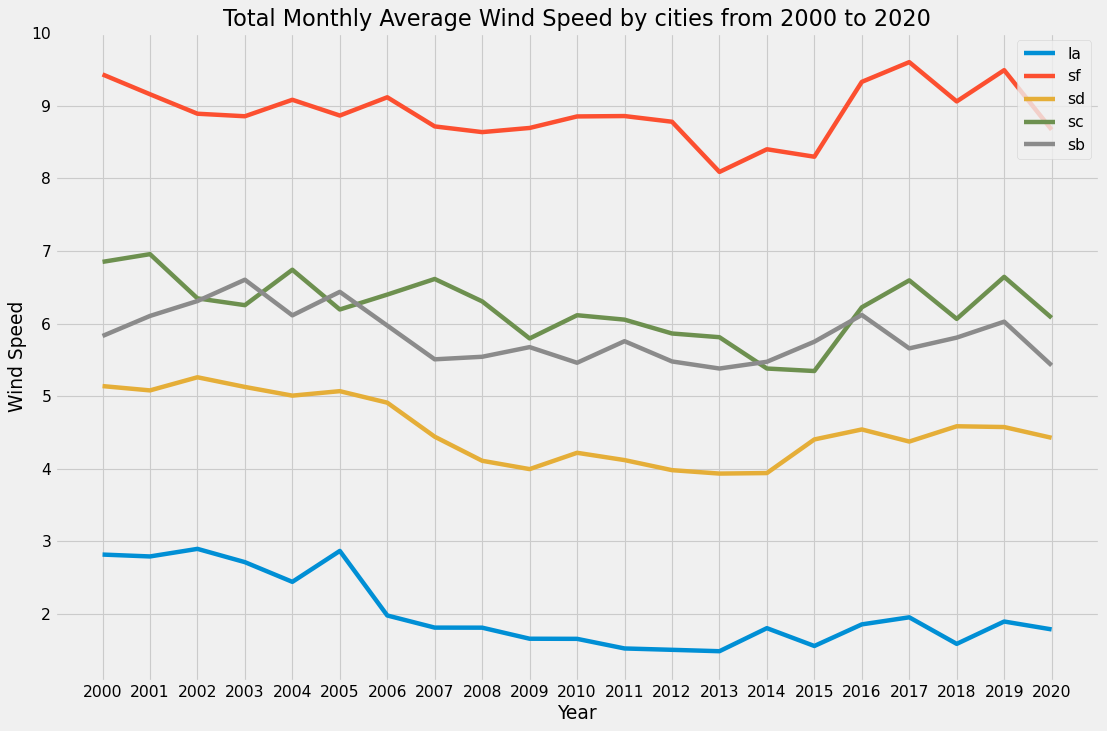

In [54]:
# Monthly Average Wind Speed
figure(figsize=(15, 10), dpi=80)
# la
plt.plot(dataset[dataset['city'] == 'la']['year'], 
         dataset[dataset['city'] == 'la']['AWND'], label='la')
# sf
plt.plot(dataset[dataset['city'] == 'sf']['year'], 
         dataset[dataset['city'] == 'sf']['AWND'], label='sf')
# sd
plt.plot(dataset[dataset['city'] == 'sd']['year'], 
         dataset[dataset['city'] == 'sd']['AWND'], label='sd')
# sc
plt.plot(dataset[dataset['city'] == 'sc']['year'], 
         dataset[dataset['city'] == 'sc']['AWND'], label='sc')
# sb
plt.plot(dataset[dataset['city'] == 'sb']['year'], 
         dataset[dataset['city'] == 'sb']['AWND'], label='sb')

plt.title('Total Monthly Average Wind Speed by cities from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.xticks(np.arange(2000, 2021, 1.0))
plt.legend()
plt.show()

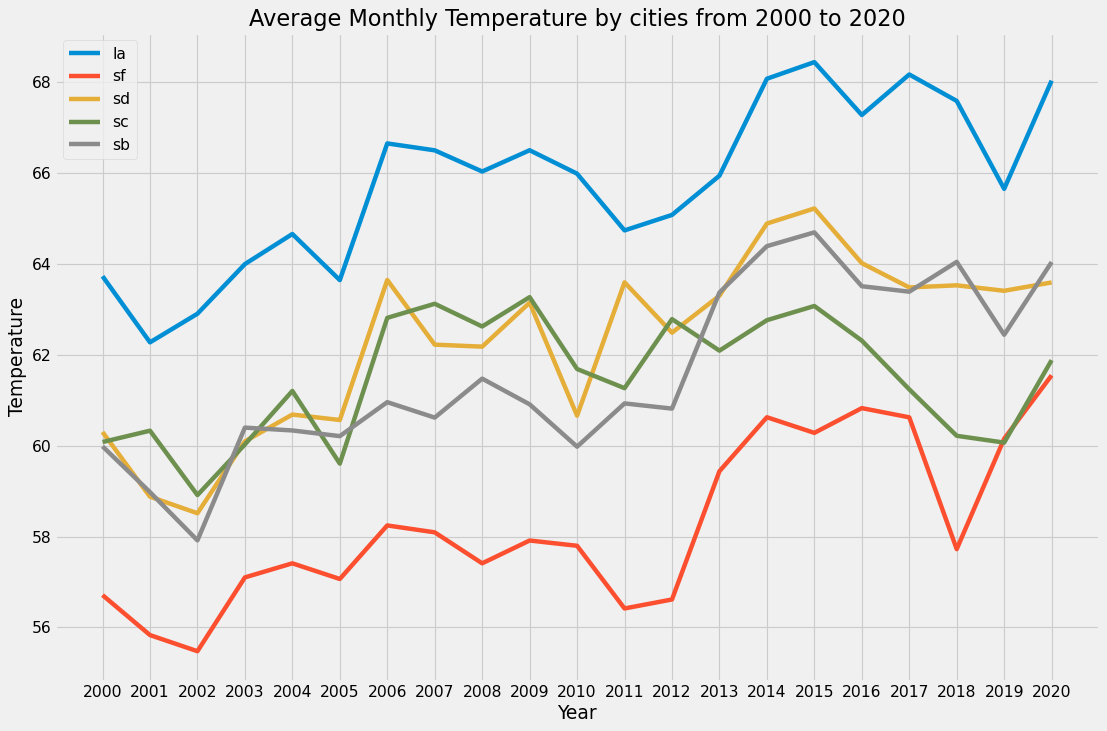

In [55]:
# Average Monthly Temperature
figure(figsize=(15, 10), dpi=80)
# la
plt.plot(dataset[dataset['city'] == 'la']['year'], 
         dataset[dataset['city'] == 'la']['TAVG'], label='la')
# sf
plt.plot(dataset[dataset['city'] == 'sf']['year'], 
         dataset[dataset['city'] == 'sf']['TAVG'], label='sf')
# sd
plt.plot(dataset[dataset['city'] == 'sd']['year'], 
         dataset[dataset['city'] == 'sd']['TAVG'], label='sd')
# sc
plt.plot(dataset[dataset['city'] == 'sc']['year'], 
         dataset[dataset['city'] == 'sc']['TAVG'], label='sc')
# sb
plt.plot(dataset[dataset['city'] == 'sb']['year'], 
         dataset[dataset['city'] == 'sb']['TAVG'], label='sb')

plt.title('Average Monthly Temperature by cities from 2000 to 2020')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(np.arange(2000, 2021, 1.0))
plt.legend()
plt.show()

### by years

### GeoPandas

In [18]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
import itertools
from itertools import product
from scipy import stats

In [16]:
#pip install geopandas

In [17]:
#pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Load the shapefile and display the relevant columns
map_data = gpd.read_file("CA_Counties/CA_Counties_TIGER2016.shx")
map_data = map_data.sort_values(by=['NAMELSAD'], ascending=True)
map_data = map_data.reset_index(drop=True)
map_data.rename({'NAMELSAD': 'County'}, axis=1, inplace=True)
map_data = map_data[['NAME', 'County', 'geometry']]
map_data.head()

,NAME,County,geometry
0,Alameda,Alameda County,"POLYGON ((-13612246.763 4538150.085, -13612346..."
1,Alpine,Alpine County,"POLYGON ((-13366503.508 4678946.015, -13366492..."
2,Amador,Amador County,"POLYGON ((-13472697.863 4647652.232, -13472697..."
3,Butte,Butte County,"POLYGON ((-13565004.793 4798394.124, -13564991..."
4,Calaveras,Calaveras County,"POLYGON ((-13428575.483 4627725.228, -13428534..."


In [22]:
# Load the shapefile and display the relevant columns
map_data = gpd.read_file("CA_State_TIGER2016.shx")
map_data = map_data.sort_values(by=['NAMELSAD'], ascending=True)
map_data = map_data.reset_index(drop=True)
map_data.rename({'NAMELSAD': 'County'}, axis=1, inplace=True)
map_data = map_data[['NAME', 'County', 'geometry']]
map_data.head()

DriverError: CA_State_TIGER2016.shx: No such file or directory

NameError: name 'map_data' is not defined

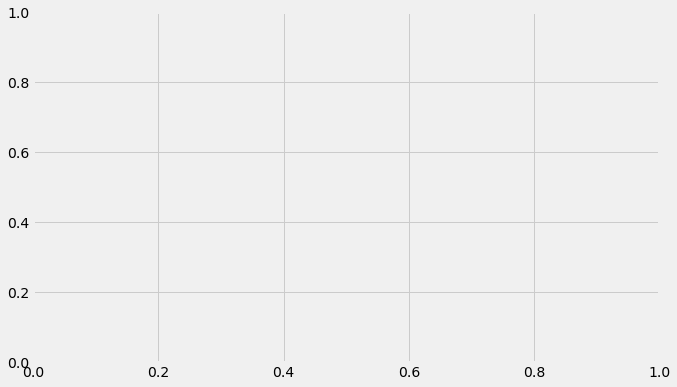

In [7]:
# Create a map displaying hate crimes per 1 million people in 2008
fig, ax = plt.subplots(1, figsize=(10,6))
map_data.plot(column='Prop_2008', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.set_title('Proportion of Hate Crimes per 1 million People in 2008')
ax.axis('off')